In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

In [3]:
import pandas as pd
import os
import sys

In [4]:
def test_dataset_loading(file_path):
    """
    Test if the dataset can be loaded properly
    """
    print(f"Testing loading dataset from: {file_path}")
    
    # Check if file exists
    if not os.path.exists(file_path):
        print(f"Error: File {file_path} not found!")
        print(f"Current working directory: {os.getcwd()}")
        print(f"Files in current directory: {os.listdir('.')}")
        return False
    
    try:
        # Try to load the dataset
        df = pd.read_csv(file_path)
        
        # Print basic information
        print(f"Dataset loaded successfully!")
        print(f"Shape: {df.shape}")
        print(f"Columns: {df.columns.tolist()}")
        
        # Check for the required columns
        required_columns = ['Text', 'Label']
        missing_columns = [col for col in required_columns if col not in df.columns]
        
        if missing_columns:
            print(f"Warning: Missing required columns: {missing_columns}")
            return False
        
        # Check for missing values in important columns
        print("\nMissing values in important columns:")
        for col in required_columns:
            missing_count = df[col].isnull().sum()
            print(f"{col}: {missing_count} missing values")
        
        # Check labels
        if 'Label' in df.columns:
            label_counts = df['Label'].value_counts().to_dict()
            print(f"\nLabel distribution: {label_counts}")
        
        # Display a few examples
        print("\nFirst 3 rows:")
        for i, row in df.head(3).iterrows():
            print(f"Row {i}:")
            print(f"  Label: {row['Label']}")
            print(f"  Text: {row['Text'][:100]}..." if len(str(row['Text'])) > 100 else f"  Text: {row['Text']}")
            print("-" * 50)
        
        return True
    
    except Exception as e:
        print(f"Error loading dataset: {str(e)}")
        import traceback
        traceback.print_exc()
        return False

In [5]:
if __name__ == "__main__":
    # Look for the file in the current directory first
    default_path = 'AD_Full_Data.csv'
    
    # Check if the default file exists in the current directory
    if os.path.exists(default_path):
        file_path = default_path
    elif len(sys.argv) > 1:
        # Use command line argument if provided
        file_path = sys.argv[1]
    else:
        # If all else fails, try with ./ prefix
        file_path = './AD_dataset.csv'
    
    print(f"Looking for dataset at: {file_path}")
    
    success = test_dataset_loading(file_path)
    
    if success:
        print("\nTest completed successfully. Dataset can be loaded properly.")
    else:
        print("\nTest failed. Please review the errors above.")
        
        # If first attempt failed and the path contains unusual characters, try the default path
        if "--f=" in file_path or "kernel" in file_path:
            print("\nAttempting to load with default filename 'AD_dataset.csv'...")
            success = test_dataset_loading('AD_dataset.csv')
            if success:
                print("\nSuccessfully loaded using the default filename.")
            else:
                print("\nStill unable to load the dataset.")

Looking for dataset at: AD_Full_Data.csv
Testing loading dataset from: AD_Full_Data.csv
Dataset loaded successfully!
Shape: (2000, 9)
Columns: ['Text', 'Published By', 'Published Date', 'Volume', 'Label', 'Journal Name', 'Digital object identifier (DOI)', 'Unnamed: 7', 'Unnamed: 8']

Missing values in important columns:
Text: 1 missing values
Label: 2 missing values

Label distribution: {1.0: 1075, 0.0: 923}

First 3 rows:
Row 0:
  Label: 0.0
  Text: Finally, we integrate the features gathered at each level, send them to the dense layers, and then m...
--------------------------------------------------
Row 1:
  Label: 1.0
  Text: The branch line coupler is structured with a two-section layout. However, this cascaded design still...
--------------------------------------------------
Row 2:
  Label: 0.0
  Text: Three kinds of features are used in these experiments to represent handwritten digital images, which...
--------------------------------------------------

Test completed successf

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# Simple text preprocessing function (no NLTK dependencies)
def simple_preprocess_text(text):
    """
    Simple text preprocessing without NLTK dependencies
    """
    if pd.isna(text) or not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Function to process the dataset
def process_dataset():
    """
    Load and process the dataset without external dependencies
    """
    try:
        # Try to load the dataset
        print("Loading dataset...")
        df = pd.read_csv('AD_Full_Data.csv')
        print(f"Dataset loaded successfully! Shape: {df.shape}")
        
        # Check for required columns
        if 'Text' not in df.columns or 'Label' not in df.columns:
            print(f"Error: Missing required columns. Available columns: {df.columns.tolist()}")
            return None
        
        # Show label distribution
        label_counts = df['Label'].value_counts()
        print(f"\nLabel distribution:\n{label_counts}")
        
        # Process the text
        print("\nPreprocessing text...")
        df['processed_text'] = df['Text'].apply(simple_preprocess_text)
        
        # Extract basic features
        print("Extracting basic features...")
        df['text_length'] = df['Text'].apply(lambda x: len(str(x)) if not pd.isna(x) else 0)
        df['word_count'] = df['processed_text'].apply(lambda x: len(x.split()) if not pd.isna(x) else 0)
        
        # Analyze text length by class
        human_texts = df[df['Label'] == 0]['text_length']
        ai_texts = df[df['Label'] == 1]['text_length']
        
        print(f"\nHuman text length stats:")
        print(f"  Mean: {human_texts.mean():.2f}")
        print(f"  Min: {human_texts.min()}")
        print(f"  Max: {human_texts.max()}")
        
        print(f"\nAI text length stats:")
        print(f"  Mean: {ai_texts.mean():.2f}")
        print(f"  Min: {ai_texts.min()}")
        print(f"  Max: {ai_texts.max()}")
        
        # Split the data
        print("\nSplitting dataset...")
        train_data, temp_data = train_test_split(df, test_size=0.1, random_state=42, stratify=df['Label'])
        val_data, test_data = train_test_split(temp_data, test_size=0.4, random_state=42, stratify=temp_data['Label'])
        
        print(f"Training set: {train_data.shape[0]} samples")
        print(f"Validation set: {val_data.shape[0]} samples")
        print(f"Test set: {test_data.shape[0]} samples")
        
        # Save the processed datasets
        print("\nSaving processed datasets...")
        train_data.to_csv('train_dataset.csv', index=False)
        val_data.to_csv('val_dataset.csv', index=False)
        test_data.to_csv('test_dataset.csv', index=False)
        
        print("Processing complete! Files saved.")
        
        # Visualize text length distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x='text_length', hue='Label', bins=30, alpha=0.6)
        plt.title('Text Length Distribution by Class')
        plt.xlabel('Text Length (characters)')
        plt.ylabel('Count')
        plt.legend(['Human (0)', 'AI (1)'])
        plt.savefig('text_length_distribution.png')
        print("Text length distribution plot saved as 'text_length_distribution.png'")
        
        return {
            'train': train_data,
            'val': val_data,
            'test': test_data
        }
    
    except Exception as e:
        print(f"Error processing dataset: {str(e)}")
        import traceback
        traceback.print_exc()
        return None


In [9]:
if __name__ == "__main__":
    print("Starting simple dataset processing...")
    result = process_dataset()
    
    if result:
        print("\nDataset processed successfully!")
    else:
        print("\nFailed to process dataset. See errors above.")

Starting simple dataset processing...
Loading dataset...
Dataset loaded successfully! Shape: (2000, 9)

Label distribution:
Label
1.0    1075
0.0     923
Name: count, dtype: int64

Preprocessing text...
Extracting basic features...

Human text length stats:
  Mean: 298.18
  Min: 0
  Max: 651

AI text length stats:
  Mean: 299.19
  Min: 92
  Max: 630

Splitting dataset...
Error processing dataset: Input y contains NaN.

Failed to process dataset. See errors above.


Traceback (most recent call last):
  File "C:\Users\KIIT\AppData\Local\Temp\ipykernel_31260\2545006857.py", line 66, in process_dataset
    train_data, temp_data = train_test_split(df, test_size=0.1, random_state=42, stratify=df['Label'])
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py", line 2806, in train_test_split
    train, test = next(cv.split(X=arrays[0], y=stratify))
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py", line 2339, in split
    y = check_array(y, input_name="y", ensure_2d=False, 

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

In [10]:

# Function to train a baseline model
def train_baseline_model():
    """
    Train a simple baseline model for text classification
    """
    try:
        # Load the preprocessed datasets
        print("Loading datasets...")
        try:
            train_df = pd.read_csv('train_dataset.csv')
            val_df = pd.read_csv('val_dataset.csv')
            test_df = pd.read_csv('test_dataset.csv')
        except FileNotFoundError:
            print("Error: Preprocessed datasets not found. Run 'simple-preprocess.py' first.")
            return None
        
        print(f"Training set: {train_df.shape[0]} samples")
        print(f"Validation set: {val_df.shape[0]} samples")
        print(f"Test set: {test_df.shape[0]} samples")
        
        # Check if processed_text column exists
        text_column = 'processed_text' if 'processed_text' in train_df.columns else 'Text'
        print(f"Using text column: {text_column}")
        
        # Check for and handle NaN values in the text column
        print("Checking for NaN values...")
        nan_counts = {
            'train': train_df[text_column].isna().sum(),
            'val': val_df[text_column].isna().sum(),
            'test': test_df[text_column].isna().sum()
        }
        
        print(f"NaN values found - Train: {nan_counts['train']}, Val: {nan_counts['val']}, Test: {nan_counts['test']}")
        
        # Replace NaN values with empty string
        train_df[text_column] = train_df[text_column].fillna("")
        val_df[text_column] = val_df[text_column].fillna("")
        test_df[text_column] = test_df[text_column].fillna("")
        
        # Convert all values to string to ensure they're the right type
        train_df[text_column] = train_df[text_column].astype(str)
        val_df[text_column] = val_df[text_column].astype(str)
        test_df[text_column] = test_df[text_column].astype(str)
        
        # Extract features using TF-IDF
        print("\nExtracting TF-IDF features...")
        tfidf_vectorizer = TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            min_df=2
        )
        
        X_train = tfidf_vectorizer.fit_transform(train_df[text_column])
        X_val = tfidf_vectorizer.transform(val_df[text_column])
        X_test = tfidf_vectorizer.transform(test_df[text_column])
        
        y_train = train_df['Label']
        y_val = val_df['Label']
        y_test = test_df['Label']
        
        print(f"TF-IDF features shape: {X_train.shape}")
        
        # Train multiple models and compare
        models = {
            'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0),
            'Linear SVM': LinearSVC(C=1.0, max_iter=10000),
            'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1),
            'Naive Bayes': MultinomialNB()
        }
        
        results = {}
        
        for model_name, model in models.items():
            print(f"\nTraining {model_name}...")
            start_time = time.time()
            
            model.fit(X_train, y_train)
            
            train_time = time.time() - start_time
            
            # Evaluate on validation set
            y_val_pred = model.predict(X_val)
            val_accuracy = accuracy_score(y_val, y_val_pred)
            
            print(f"{model_name} - Validation Accuracy: {val_accuracy:.4f}")
            print(f"Training Time: {train_time:.2f} seconds")
            
            results[model_name] = {
                'model': model,
                'val_accuracy': val_accuracy,
                'train_time': train_time
            }
        
        # Find the best model
        best_model_name = max(results, key=lambda k: results[k]['val_accuracy'])
        best_model = results[best_model_name]['model']
        
        print(f"\nBest model: {best_model_name} with validation accuracy: {results[best_model_name]['val_accuracy']:.4f}")
        
        # Evaluate the best model on test data
        y_test_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        print(f"\nTest Results for {best_model_name}:")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(classification_report(y_test, y_test_pred))
        
        # Create confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {best_model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.savefig('confusion_matrix.png')
        print("Confusion matrix saved as 'confusion_matrix.png'")
        
        # Feature importance for Logistic Regression
        if best_model_name == 'Logistic Regression':
            coefficients = best_model.coef_[0]
            feature_names = tfidf_vectorizer.get_feature_names_out()
            
            # Top features for each class
            top_positive_idx = np.argsort(coefficients)[-20:]
            top_negative_idx = np.argsort(coefficients)[:20]
            
            top_positive_features = [(feature_names[i], coefficients[i]) for i in top_positive_idx]
            top_negative_features = [(feature_names[i], coefficients[i]) for i in top_negative_idx]
            
            print("\nTop features indicating AI-generated text:")
            for feature, coef in reversed(top_positive_features):
                print(f"{feature}: {coef:.4f}")
                
            print("\nTop features indicating human-generated text:")
            for feature, coef in top_negative_features:
                print(f"{feature}: {coef:.4f}")
        
        # Save the best model and vectorizer
        joblib.dump(best_model, f"{best_model_name.lower().replace(' ', '_')}_model.pkl")
        joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
        
        print(f"\nBest model saved as '{best_model_name.lower().replace(' ', '_')}_model.pkl'")
        print("Vectorizer saved as 'tfidf_vectorizer.pkl'")
        
        # Plot model comparison
        model_names = list(results.keys())
        accuracies = [results[name]['val_accuracy'] for name in model_names]
        
        plt.figure(figsize=(10, 5))
        plt.bar(model_names, accuracies)
        plt.title('Model Comparison - Validation Accuracy')
        plt.xlabel('Model')
        plt.ylabel('Accuracy')
        plt.ylim(0.5, 1.0)
        for i, acc in enumerate(accuracies):
            plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')
        plt.savefig('model_comparison.png')
        print("Model comparison plot saved as 'model_comparison.png'")
        
        return {
            'best_model': best_model,
            'best_model_name': best_model_name,
            'vectorizer': tfidf_vectorizer,
            'test_accuracy': test_accuracy
        }
        
    except Exception as e:
        print(f"Error training model: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# Function to create a prediction function
def create_prediction_function(model_path=None, vectorizer_path=None):
    """
    Create a function to predict if text is AI or human-generated
    """
    # Load model and vectorizer
    if model_path is None:
        model_path = "logistic_regression_model.pkl"  # default name
    
    if vectorizer_path is None:
        vectorizer_path = "tfidf_vectorizer.pkl"
    
    try:
        model = joblib.load(model_path)
        vectorizer = joblib.load(vectorizer_path)
        
        def predict_text(text):
            # Preprocess text (simple version)
            import re
            processed_text = text.lower()
            processed_text = re.sub(r'[^\w\s]', ' ', processed_text)
            processed_text = re.sub(r'\s+', ' ', processed_text).strip()
            
            # Vectorize
            text_features = vectorizer.transform([processed_text])
            
            # Predict
            prediction = model.predict(text_features)[0]
            
            if hasattr(model, 'predict_proba'):
                probabilities = model.predict_proba(text_features)[0]
                confidence = probabilities[prediction]
            else:
                # For models without predict_proba (like LinearSVC)
                decision_values = model.decision_function(text_features)[0]
                confidence = 1 / (1 + np.exp(-abs(decision_values)))
            
            result = {
                'prediction': 'AI-generated' if prediction == 1 else 'Human-generated',
                'confidence': float(confidence),
                'label': int(prediction)
            }
            
            return result
        
        print("Prediction function created successfully!")
        return predict_text
        
    except FileNotFoundError:
        print("Error: Model or vectorizer file not found. Train the model first.")
        return None
    except Exception as e:
        print(f"Error creating prediction function: {str(e)}")
        return None



Training baseline model for AI vs Human text classification...
Loading datasets...
Training set: 1176 samples
Validation set: 147 samples
Test set: 147 samples
Using text column: processed_text
Checking for NaN values...
NaN values found - Train: 1, Val: 0, Test: 0

Extracting TF-IDF features...
TF-IDF features shape: (1176, 5000)

Training Logistic Regression...
Logistic Regression - Validation Accuracy: 0.7415
Training Time: 0.02 seconds

Training Linear SVM...
Linear SVM - Validation Accuracy: 0.7279
Training Time: 0.01 seconds

Training Random Forest...
Random Forest - Validation Accuracy: 0.6871
Training Time: 0.28 seconds

Training Naive Bayes...
Naive Bayes - Validation Accuracy: 0.7279
Training Time: 0.00 seconds

Best model: Logistic Regression with validation accuracy: 0.7415

Test Results for Logistic Regression:
Test Accuracy: 0.7483
              precision    recall  f1-score   support

           0       0.75      0.68      0.71        68
           1       0.74      0.81

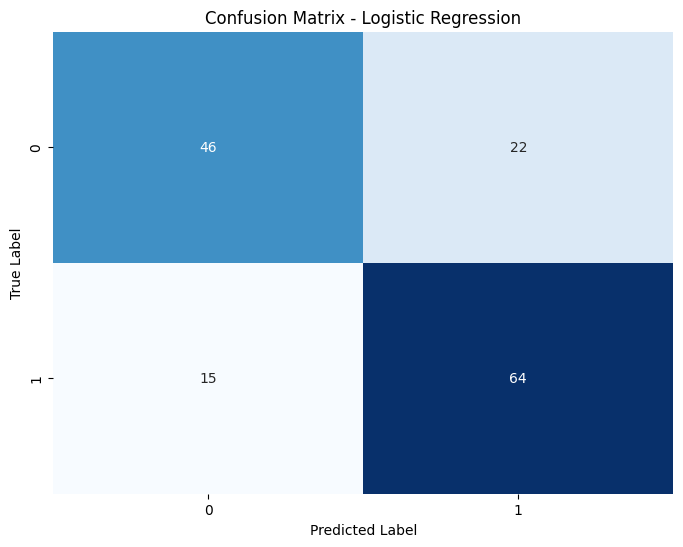

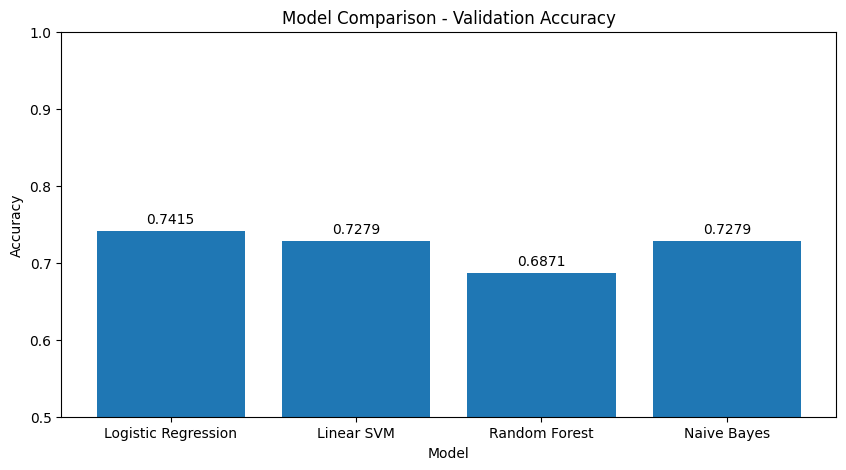

In [27]:
# Main execution
if __name__ == "__main__":
    print("Training baseline model for AI vs Human text classification...")
    result = train_baseline_model()
    
    if result:
        print("\nModel training completed successfully!")
        
        # Create and test the prediction function
        print("\nCreating prediction function...")
        model_path = f"{result['best_model_name'].lower().replace(' ', '_')}_model.pkl"
        predict_function = create_prediction_function(model_path, "tfidf_vectorizer.pkl")
        
        if predict_function:
            # Test with sample texts
            print("\nTesting prediction function with sample texts:")
            
            sample_texts = [
                "The integration of artificial intelligence in healthcare has revolutionized patient care through improved diagnostics and personalized treatment plans.",
                "The branch line coupler is structured with a two-section layout. However, this cascaded design still faces bandwidth limitations.",
                "We analyzed the data from multiple experiments and found significant correlations between the variables, suggesting a strong causal relationship."
            ]
            
            for i, text in enumerate(sample_texts):
                prediction = predict_function(text)
                print(f"\nSample {i+1}:")
                print(f"Text: {text[:100]}...")
                print(f"Prediction: {prediction['prediction']}")
                print(f"Confidence: {prediction['confidence']:.4f}")
        
        print("\nReady for text classification!")
    else:
        print("\nModel training failed. See errors above.")

In [18]:
import joblib
import re
import numpy as np
import sys

def preprocess_text(text):
    """
    Simple text preprocessing
    """
    # Convert to lowercase
    processed = text.lower()
    
    # Remove special characters
    processed = re.sub(r'[^\w\s]', ' ', processed)
    
    # Remove extra spaces
    processed = re.sub(r'\s+', ' ', processed).strip()
    
    return processed

def load_model(model_path="logistic_regression_model.pkl", vectorizer_path="tfidf_vectorizer.pkl"):
    """
    Load the trained model and vectorizer
    """
    try:
        # Load model and vectorizer
        model = joblib.load(model_path)
        vectorizer = joblib.load(vectorizer_path)
        
        print(f"Model loaded: {model_path}")
        print(f"Vectorizer loaded: {vectorizer_path}")
        
        return model, vectorizer
    
    except FileNotFoundError:
        print(f"Error: Could not find model or vectorizer file.")
        print(f"Make sure {model_path} and {vectorizer_path} exist.")
        return None, None
    
    except Exception as e:
        print(f"Error loading model: {str(e)}")
        return None, None

def classify_text(text, model, vectorizer):
    """
    Classify a text as AI-generated or human-generated
    """
    # Preprocess the text
    processed_text = preprocess_text(text)
    
    # Transform text to features
    features = vectorizer.transform([processed_text])
    
    # Make prediction
    prediction = model.predict(features)[0]
    
    # Get confidence score
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(features)[0]
        confidence = probabilities[prediction]
    else:
        # For models without predict_proba (like LinearSVC)
        decision_values = model.decision_function(features)[0]
        confidence = 1 / (1 + np.exp(-abs(decision_values)))
    
    # Return result
    result = {
        'prediction': 'AI-generated' if prediction == 1 else 'Human-generated',
        'confidence': float(confidence),
        'label': int(prediction)
    }
    
    return result

def main():
    """
    Main function for the text classifier
    """
    print("AI vs Human Text Classifier")
    print("===========================")
    
    # Load model and vectorizer
    model, vectorizer = load_model()
    
    if model is None or vectorizer is None:
        return
    
    # Check for command line input
    if len(sys.argv) > 1:
        # Text provided as command line argument
        text = ' '.join(sys.argv[1:])
        result = classify_text(text, model, vectorizer)
        
        print(f"\nInput Text: {text[:100]}..." if len(text) > 100 else f"\nInput Text: {text}")
        print(f"Prediction: {result['prediction']}")
        print(f"Confidence: {result['confidence']:.4f}")
        
    else:
        # Interactive mode
        print("\nEnter text to classify (type 'exit' to quit):")
        
        while True:
            text = input("\n> ")
            
            if text.lower() == 'exit':
                break
            
            if not text.strip():
                continue
                
            result = classify_text(text, model, vectorizer)
            
            print(f"Prediction: {result['prediction']}")
            print(f"Confidence: {result['confidence']:.4f}")
    
    print("\nThank you for using the AI vs Human Text Classifier!")

if __name__ == "__main__":
    main()

AI vs Human Text Classifier
Model loaded: logistic_regression_model.pkl
Vectorizer loaded: tfidf_vectorizer.pkl

Input Text: --f=c:\Users\KIIT\AppData\Roaming\jupyter\runtime\kernel-v32d98f4a52ba46164413e66793b86aa09990674ba....
Prediction: AI-generated
Confidence: 0.5821

Thank you for using the AI vs Human Text Classifier!


Loading model from logistic_regression_model.pkl...
Using text column: processed_text

===== Model Performance Metrics =====
Accuracy: 0.8150
Precision: 0.8223
Recall: 0.8150
F1 Score: 0.8125

Classification Report:
              precision    recall  f1-score   support

       Human       0.87      0.71      0.78        93
AI-generated       0.78      0.91      0.84       107

    accuracy                           0.81       200
   macro avg       0.83      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



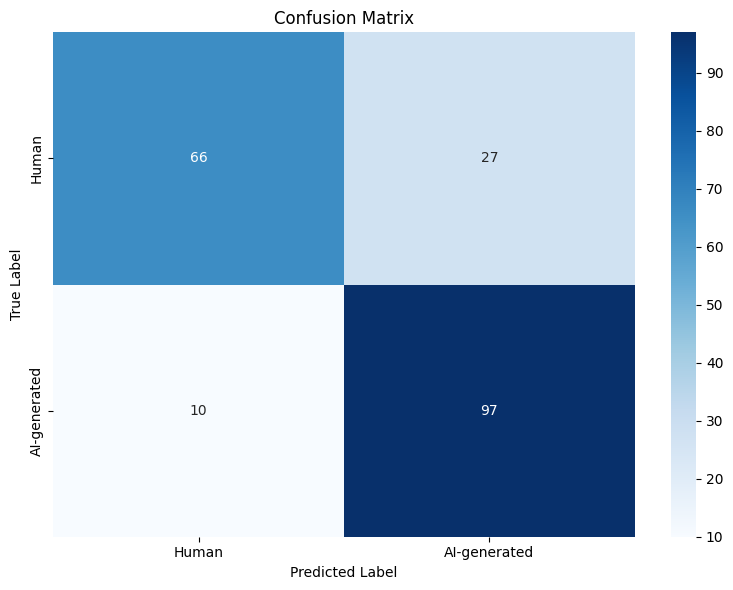

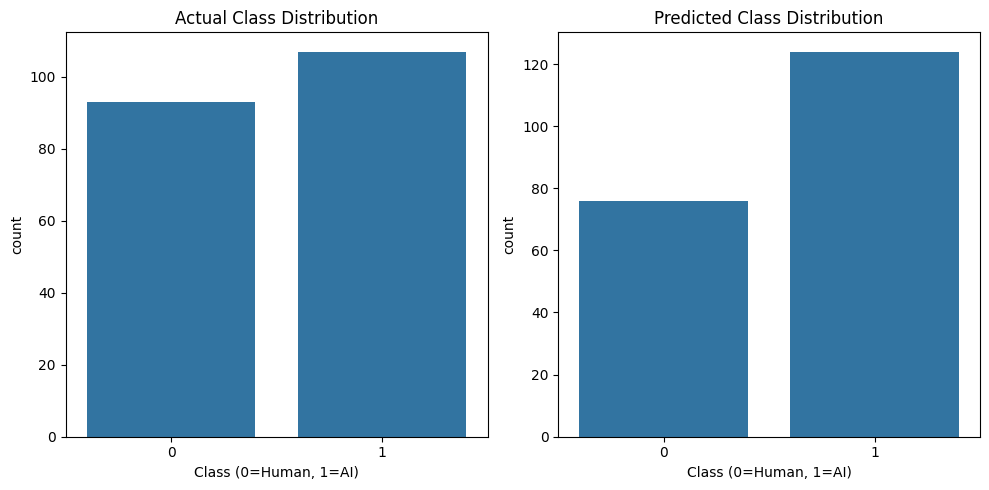

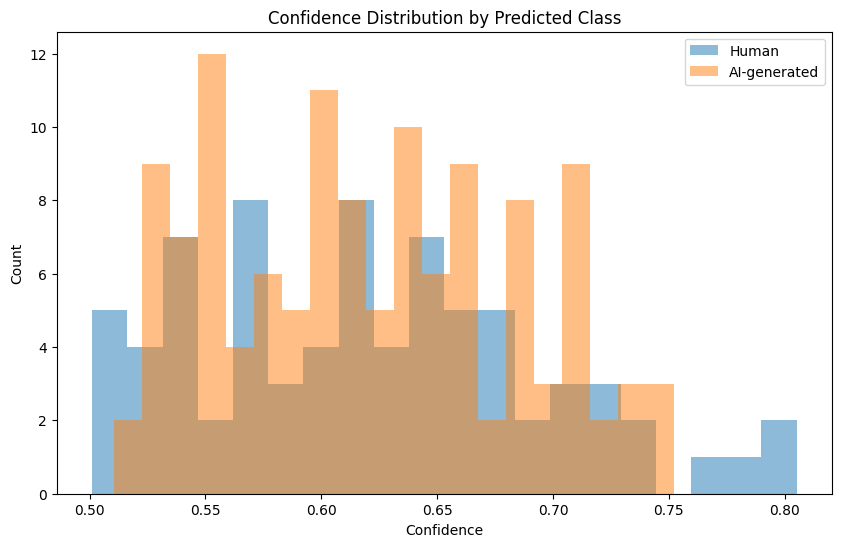

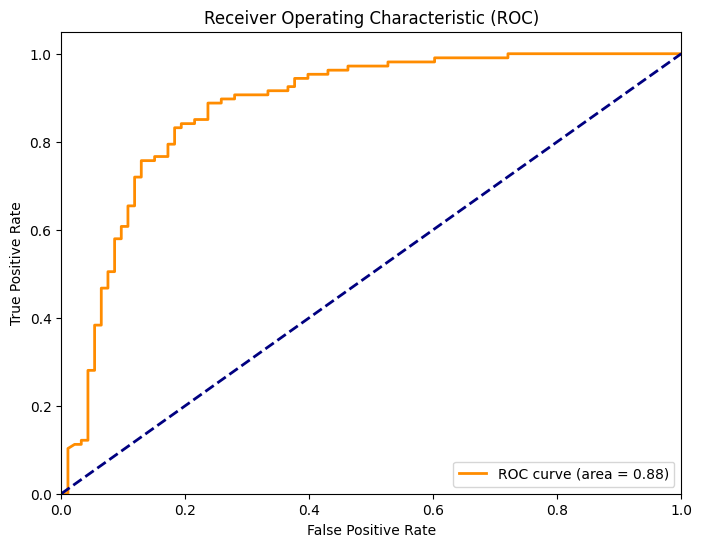


Evaluating Logistic Regression model...
Loading model from logistic_regression_model.pkl...
Using text column: processed_text

===== Model Performance Metrics =====
Accuracy: 0.8150
Precision: 0.8223
Recall: 0.8150
F1 Score: 0.8125

Classification Report:
              precision    recall  f1-score   support

       Human       0.87      0.71      0.78        93
AI-generated       0.78      0.91      0.84       107

    accuracy                           0.81       200
   macro avg       0.83      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



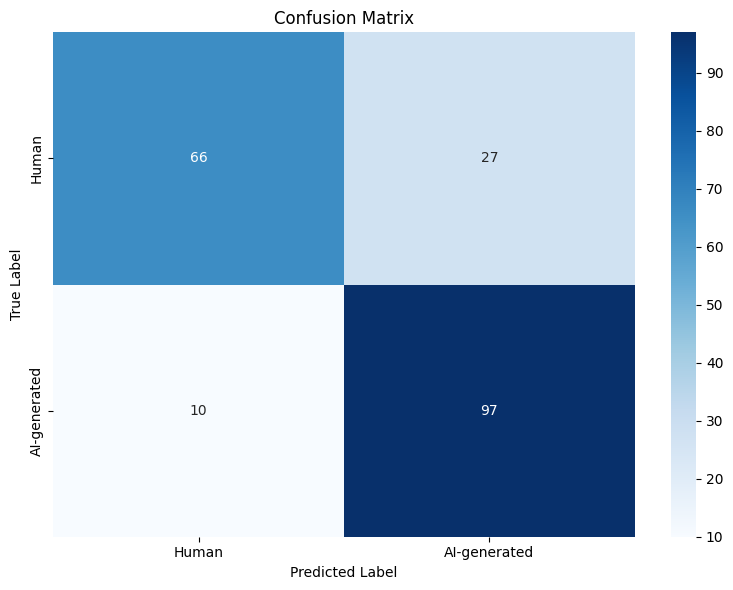

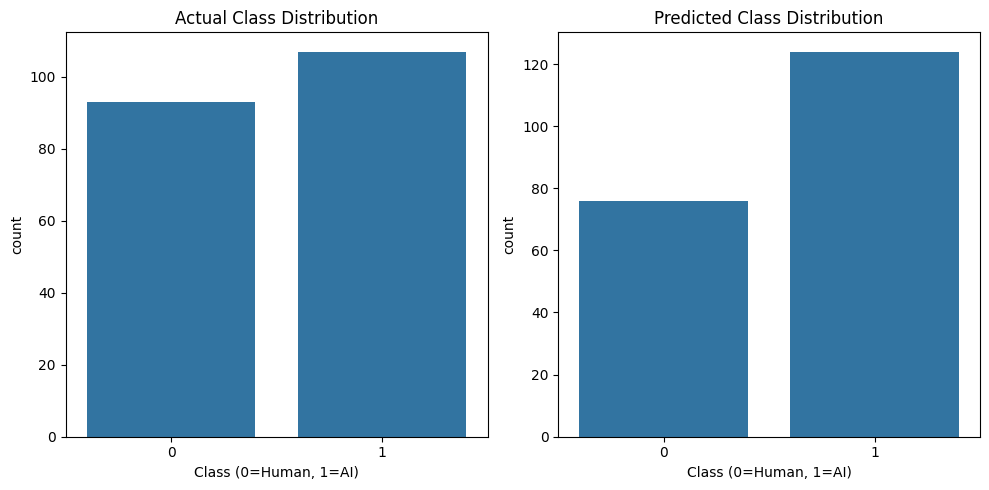

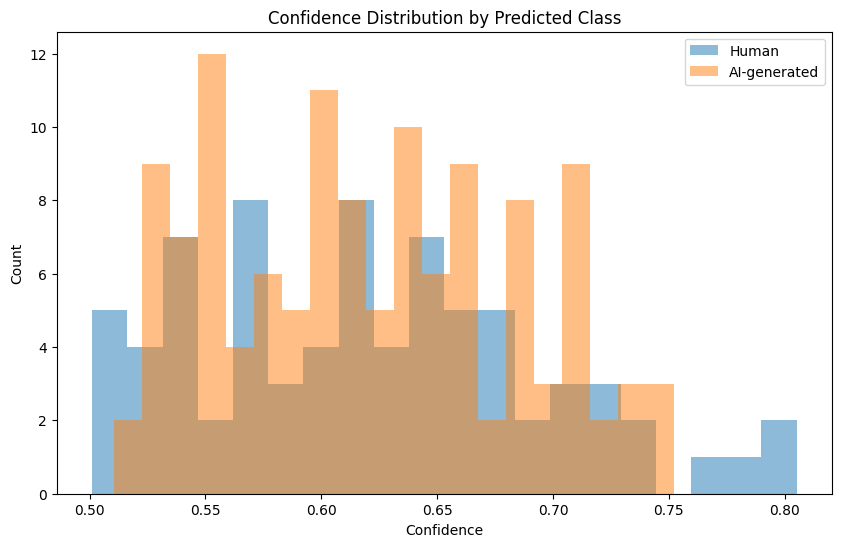

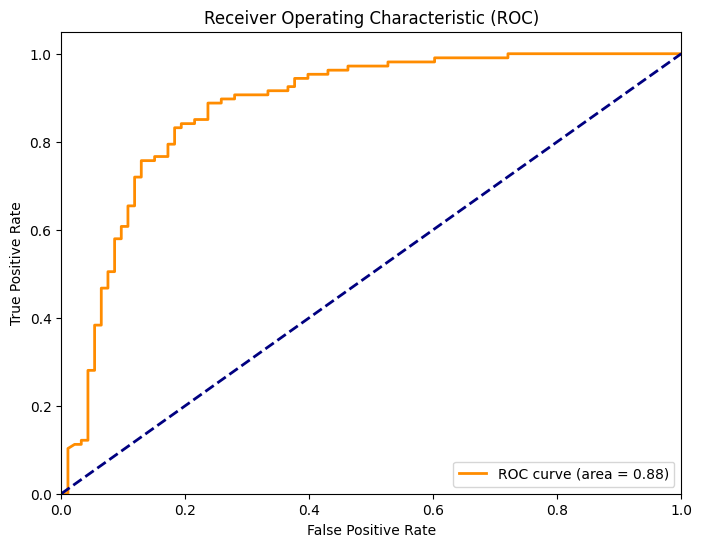

Model random_forest_model.pkl not found or couldn't be loaded.
Model linear_svc_model.pkl not found or couldn't be loaded.
Model naive_bayes_model.pkl not found or couldn't be loaded.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
import joblib

def evaluate_model(model_path='logistic_regression_model.pkl', vectorizer_path='tfidf_vectorizer.pkl', test_path='test_dataset.csv'):
    """
    Evaluate the model performance and display metrics
    """
    try:
        # Load the model and vectorizer
        print(f"Loading model from {model_path}...")
        model = joblib.load(model_path)
        vectorizer = joblib.load(vectorizer_path)
        
        # Load test data
        test_df = pd.read_csv(test_path)
        
        # Check for text column
        text_column = 'processed_text' if 'processed_text' in test_df.columns else 'Text'
        print(f"Using text column: {text_column}")
        
        # Handle missing values
        test_df[text_column] = test_df[text_column].fillna("").astype(str)
        
        # Transform test data
        X_test = vectorizer.transform(test_df[text_column])
        y_test = test_df['Label']
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        
        # Print metrics
        print("\n===== Model Performance Metrics =====")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        # Print classification report
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=['Human', 'AI-generated']))
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Human', 'AI-generated'], 
                    yticklabels=['Human', 'AI-generated'])
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()
        
        # Plot class distribution
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        sns.countplot(x='Label', data=test_df)
        plt.title('Actual Class Distribution')
        plt.xlabel('Class (0=Human, 1=AI)')
        
        plt.subplot(1, 2, 2)
        sns.countplot(x=y_pred)
        plt.title('Predicted Class Distribution')
        plt.xlabel('Class (0=Human, 1=AI)')
        
        plt.tight_layout()
        plt.show()
        
        # If model has predict_proba, plot confidence distribution
        if hasattr(model, 'predict_proba'):
            plt.figure(figsize=(10, 6))
            probs = model.predict_proba(X_test)
            
            # Get confidence for the predicted class
            confidences = [prob[pred] for prob, pred in zip(probs, y_pred)]
            
            # Create separate confidence distributions for each class
            human_conf = [conf for conf, pred in zip(confidences, y_pred) if pred == 0]
            ai_conf = [conf for conf, pred in zip(confidences, y_pred) if pred == 1]
            
            plt.hist(human_conf, alpha=0.5, label='Human', bins=20)
            plt.hist(ai_conf, alpha=0.5, label='AI-generated', bins=20)
            plt.title('Confidence Distribution by Predicted Class')
            plt.xlabel('Confidence')
            plt.ylabel('Count')
            plt.legend()
            plt.show()
            
            # Plot ROC curve
            from sklearn.metrics import roc_curve, auc
            fpr, tpr, _ = roc_curve(y_test, probs[:, 1])
            roc_auc = auc(fpr, tpr)
            
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC)')
            plt.legend(loc='lower right')
            plt.show()
            
        return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
    
    except Exception as e:
        print(f"Error evaluating model: {str(e)}")
        return None

# Run the evaluation
metrics = evaluate_model()

# If you want to compare multiple models
model_files = {
    'Logistic Regression': 'logistic_regression_model.pkl',
    'Random Forest': 'random_forest_model.pkl',
    'SVM': 'linear_svc_model.pkl',
    'Naive Bayes': 'naive_bayes_model.pkl'
}

# Check which models exist and evaluate them
results = {}
for name, path in model_files.items():
    try:
        if joblib.load(path):
            print(f"\nEvaluating {name} model...")
            results[name] = evaluate_model(model_path=path)
    except:
        print(f"Model {path} not found or couldn't be loaded.")

# Compare models if multiple were evaluated
if len(results) > 1:
    models = list(results.keys())
    accuracy = [results[m]['accuracy'] for m in models]
    precision = [results[m]['precision'] for m in models]
    recall = [results[m]['recall'] for m in models]
    f1 = [results[m]['f1'] for m in models]
    
    # Plot comparison
    plt.figure(figsize=(12, 8))
    x = np.arange(len(models))
    width = 0.2
    
    plt.bar(x - width*1.5, accuracy, width, label='Accuracy')
    plt.bar(x - width/2, precision, width, label='Precision')
    plt.bar(x + width/2, recall, width, label='Recall')
    plt.bar(x + width*1.5, f1, width, label='F1 Score')
    
    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.xticks(x, models)
    plt.legend()
    plt.ylim(0, 1)
    
    # Add values on bars
    for i, v in enumerate(accuracy):
        plt.text(i - width*1.5, v + 0.02, f'{v:.2f}', ha='center')
    for i, v in enumerate(precision):
        plt.text(i - width/2, v + 0.02, f'{v:.2f}', ha='center')
    for i, v in enumerate(recall):
        plt.text(i + width/2, v + 0.02, f'{v:.2f}', ha='center')
    for i, v in enumerate(f1):
        plt.text(i + width*1.5, v + 0.02, f'{v:.2f}', ha='center')
    
    plt.tight_layout()
    plt.show()